In [1]:
%matplotlib inline
from IPython import display
import glob
from utils_demo import *

import os
import sys
sys.path.append(os.path.abspath('../simulation'))

from PIL import Image
import matplotlib.pyplot as plt

from tqdm import tqdm

from unity_simulator.comm_unity import UnityCommunication
from unity_simulator import utils_viz

# Show Original Environment

In [ ]:
import json

# Reset the environment and retrieve the initial graph structure
comm.reset(4)
s, graph = comm.environment_graph()

# print(json.dumps(graph, indent=4))

imgs_prev = get_scene_cameras(comm, [4])
display_grid_img(imgs_prev, nrows=1)

## Customize Environment
```
try to change the room numbers of environment 4. The next codes I tried to keep living room and remove other rooms.
```

In [ ]:
# Find Floor, Walls, Ceiling, Doors, Lamps, Decor IDs
items_ids = [node["id"] for node in graph['nodes'] if node["category"] in ["Walls", "Ceiling", "Doors", "Lamps"]]

# Find edges attached to the living room.
living_room_id = 11
edges_attached_livingroom_id = [
    edge["from_id"] for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] in items_ids
]
edges_attached_livingroom = [
    edge for edge in graph['edges'] if int(edge["to_id"]) == living_room_id and edge["from_id"] in items_ids
]

edges_attached_livingroom_id.append(living_room_id)

# Construct a subgraph based on nodes and edges connected to the living room, excluding furniture
my_graph = {
    "nodes": [node for node in graph['nodes'] if int(node["id"]) in edges_attached_livingroom_id],
    "edges": edges_attached_livingroom
}

print(json.dumps(my_graph, indent=4))

print("Number of nodes in subgraph:", len(my_graph['nodes']))
print("Number of edges in subgraph:", len(my_graph['edges']))

# Expand the scene with the constructed subgraph
success, message = comm.expand_scene(my_graph)
print("Expand scene success:", success)

# Retrieve and print the updated graph
s, new_graph = comm.environment_graph()
print("Number of nodes in updated graph:", len(new_graph['nodes']))
print("Number of edges in updated graph:", len(new_graph['edges']))

# Print the updated graph in a formatted JSON string
print(json.dumps(new_graph, indent=4))



In [ ]:
add_node(new_graph, {
    "id": 29,
    "category": "Furniture",
    "class_name": "desk",
    "prefab_name": "PRE_FUR_CPU_table_01_02",
    "obj_transform": {
        "position": [
            1.893,
            0.0,
            -0.7
        ],
        "rotation": [
            0.0,
            1.0,
            0.0,
            2.324581e-06
        ],
        "scale": [
            1.0,
            1.0,
            1.0
        ]
    },
    "bounding_box": {
        "center": [
            1.893,
            0.475000024,
            -0.7
        ],
        "size": [
            1.06799066,
            0.950000048,
            2.02800512
        ]
    },
    "properties": [
        "SURFACES",
        "CAN_OPEN",
        "MOVABLE"
    ],
    "states": [
        "CLOSED"
    ]
})


add_edge(new_graph, 29, 'INSIDE', 11)
# add_edge(new_graph, 78, "ON", 29)

In [ ]:
success, message = comm.expand_scene(new_graph)

In [ ]:
imgs_prev = get_scene_cameras(comm, [4])
display_grid_img(imgs_prev, nrows=1)

In [ ]:
s, c = comm.camera_count()
print(c)
views = []
for i in range(16, 32):
    view = get_scene_cameras(comm, [i])
    views += view
display.display(display_grid_img(views, nrows=4))
   

In [ ]:
comm.add_character('chars/Female2', position=[0, 0, 0], initial_room='livingroom')

In [ ]:
success, graph = comm.environment_graph()
room = find_nodes(graph, class_name="livingroom")[0]
print(room)

# My test

In [ ]:
import json

comm.reset(4)
s, g = comm.environment_graph()

rooms_id = [111, 214, 276]
# relation_type = ["INSIDE", ""]

object_in_room = [
    edge['from_id'] for edge in g['edges']
    if (int(edge['to_id']) in rooms_id) and edge['relation_type'] == "INSIDE"
]

tmp_graph = {
    'nodes': [node for node in g['nodes'] if node['id'] not in object_in_room],
    'edges': [edge for edge in g['edges'] if edge['from_id'] not in object_in_room and 
                                             edge['to_id'] not in object_in_room]
}

new_graph = {
    'nodes': [node for node in tmp_graph['nodes'] if node['id'] not in [28, 30, 108]],
    'edges': [edge for edge in tmp_graph['edges'] if edge['from_id'] not in [28, 30, 108] and
                                                     edge['to_id'] not in [28, 30, 108]]
}



comm.expand_scene(new_graph)

s, g = comm.environment_graph()

# print(json.dumps(new_graph, indent=4))

imgs_prev = get_scene_cameras(comm, [-1])
display_grid_img(imgs_prev, nrows=1)




In [ ]:
# Remove stuff from the table and add the character
table = [node for node in g['nodes'] if node['class_name'] == 'desk'][0]
mouse = [node for node in g['nodes'] if node['class_name'] == 'mouse'][0]
mouse_id = mouse['id']
table_id = table['id']

objects_on_table = [edge['from_id'] for edge in g['edges'] 
                    if edge['to_id'] == table['id'] and edge['relation_type'] == 'ON']

# objects_on_table.remove(mouse_id)

new_graph = {
    'nodes': [node for node in g['nodes'] if node['id'] not in objects_on_table],
    'edges': [edge for edge in g['edges'] if edge['from_id'] not in objects_on_table and 
                                             edge['to_id'] not in objects_on_table]
}

# add_node(new_graph, {
#     'id': 1000, 
#     'category': 'Props',
#     'class_name': 'apple', 
#     'prefab_name': 'FMGP_PRE_Apple_1024',
#     "obj_transform": {
#         "position": [
#             3.648,
#             2.964,
#             -1.288
#         ],
#         "rotation": [
#             0.0,
#             0.9564035,
#             0.0,
#             -0.292048633
#         ],
#         "scale": [
#             1.0,
#             1.0,
#             1.0
#         ]
#     },
#     "bounding_box": {
#         "center": [
#             2.64799988,
#             0.9841251,
#             -1.28800011
#         ],
#         "size": [
#             0.2096219,
#             0.0402507074,
#             0.189277947
#         ]
#     },
#     "properties": [
#         "GRABBABLE",
#         "MOVABLE"
#     ],
#     "states": []})
# add_edge(new_graph, 1000, 'ON', 29)
# add_edge(new_graph, 1000, 'INSIDE', 11)

add_node(graph, {'class_name': 'cat', 
                   'category': 'Animals', 
                   'id': 1000, 
                   'properties': [], 
                   'states': []})
add_edge(graph, 1000, 'ON', 29)

# print(json.dumps(new_graph, indent=4))

comm.expand_scene(new_graph)

s, g = comm.environment_graph()
imgs_prev = get_scene_cameras(comm, [4])
display_grid_img(imgs_prev, nrows=1)

In [ ]:
comm.add_character('chars/Female2', initial_room='livingroom')

script = ['<char0> [Walk] <desk> ({})'.format(table_id),
          '<char0> [Find] <mouse> ({})'.format(mouse_id),
          '<char0> [Grab] <mouse> ({})'.format(mouse_id),
          '<char0> [Walk] <sofa> ({})'.format(27),
          '<char0> [Sit] <sofa> ({})'.format(27)]

s, m = comm.render_script(script,
                          processing_time_limit=60,
                          find_solution=False,
                          image_width=320,
                          image_height=240,  
                          skip_animation=False,
                          recording=True,
                          save_pose_data=True,
                          file_name_prefix='test',
                          camera_mode=['FIRST_PERSON'])

In [ ]:
path_video = "../simulation/unity_simulator/linux_exec/Output/"
utils_viz.generate_video(input_path=path_video, prefix='test', output_path='../simulation/unity_simulator/linux_exec/Output/', frame_rate=1)

# Try
> I try to keep all the rooms and just remove the items on the desk to see if I could put some items on it.

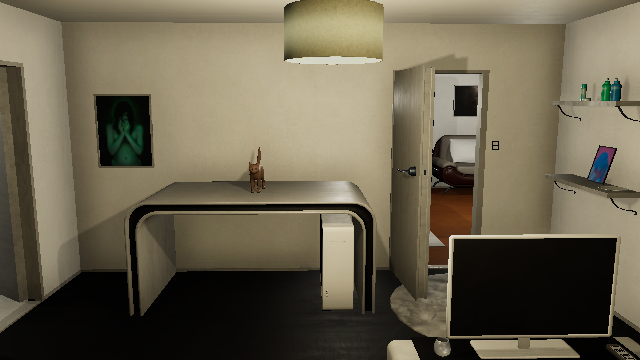

In [8]:
comm.reset(4)
s, g = comm.environment_graph()
# Remove stuff from the table and add the character
desk = [node for node in g['nodes'] if node['class_name'] == 'desk'][0]
# mouse = [node for node in g['nodes'] if node['class_name'] == 'mouse'][0]
# mouse_id = mouse['id']
desk_id = desk['id']

objects_on_desk = [edge['from_id'] for edge in g['edges'] 
                    if edge['to_id'] == desk['id'] and edge['relation_type'] == 'ON']

objects_on_desk.append(28)

new_graph = {
    'nodes': [node for node in g['nodes'] if node['id'] not in objects_on_desk],
    'edges': [edge for edge in g['edges'] if edge['from_id'] not in objects_on_desk and 
                                             edge['to_id'] not in objects_on_desk]
}

add_node(new_graph, {'class_name': 'Cat', 
                   'category': 'Animials', 
                   'id': 1000, 
                   'properties': [], 
                   'states': []})
add_edge(new_graph, 1000, 'ON', desk_id)

comm.expand_scene(new_graph)

s, g = comm.environment_graph()
imgs_prev = get_scene_cameras(comm, [4])
display_grid_img(imgs_prev, nrows=1)

In [9]:
comm.add_character('chars/Female2', initial_room='livingroom')

s, g = comm.environment_graph()
cat_id = [node['id'] for node in g['nodes'] if node['class_name'] == 'cat'][0]
print(cat_id)


script = ['<char0> [Walk] <desk> ({})'.format(29),
          '<char0> [Find] <cat> ({})'.format(cat_id),
          '<char0> [Grab] <cat> ({})'.format(cat_id),
          '<char0> [Walk] <sofa> ({})'.format(27),
          '<char0> [Sit] <sofa> ({})'.format(27)]

s, m = comm.render_script(script,
                          processing_time_limit=60,
                          find_solution=False,
                          image_width=320,
                          image_height=240,  
                          skip_animation=False,
                          recording=True,
                          save_pose_data=True,
                          file_name_prefix='test',
                          camera_mode=['FIRST_PERSON'])

368


In [10]:
path_video = "../simulation/unity_simulator/linux_exec/Output/"
utils_viz.generate_video(input_path=path_video, prefix='test', output_path='../simulation/unity_simulator/linux_exec/Output/', frame_rate=1)

Video generated at  ../simulation/unity_simulator/linux_exec/Output//video_normal.mp4


ffmpeg version 6.1.1-3ubuntu5+esm1 Copyright (c) 2000-2023 the FFmpeg developers
  built with gcc 13 (Ubuntu 13.2.0-23ubuntu4)
  configuration: --prefix=/usr --extra-version=3ubuntu5+esm1 --toolchain=hardened --libdir=/usr/lib/x86_64-linux-gnu --incdir=/usr/include/x86_64-linux-gnu --arch=amd64 --enable-gpl --disable-stripping --disable-omx --enable-gnutls --enable-libaom --enable-libass --enable-libbs2b --enable-libcaca --enable-libcdio --enable-libcodec2 --enable-libdav1d --enable-libflite --enable-libfontconfig --enable-libfreetype --enable-libfribidi --enable-libglslang --enable-libgme --enable-libgsm --enable-libharfbuzz --enable-libmp3lame --enable-libmysofa --enable-libopenjpeg --enable-libopenmpt --enable-libopus --enable-librubberband --enable-libshine --enable-libsnappy --enable-libsoxr --enable-libspeex --enable-libtheora --enable-libtwolame --enable-libvidstab --enable-libvorbis --enable-libvpx --enable-libwebp --enable-libx265 --enable-libxml2 --enable-libxvid --enable-lib

In [ ]:
# # This is to get a camera view on top of the character
# cc = comm.camera_count()[1] - 7


# # Start grabbing the mouse and go to the table
# script1 = [f'<char0> [grab] <mouse> ({mouse_id})', 
#            f'<char0> [walk] <desk> ({table_id})']
# s, m = comm.render_script(script1, skip_animation=True)

# images = []

# # Place the mouse in some position
# posx, posy = 0, 0
# script2 = [f'<char0> [putback] <mouse> ({mouse_id}) <desk> ({table_id}) <position> {posx},{posy}']
# s, m = comm.render_script(script2,
#                           processing_time_limit=60,
#                           find_solution=False,
#                           image_width=320,
#                           image_height=240,  
#                           skip_animation=False,
#                           recording=True,
#                           save_pose_data=True,
#                           file_name_prefix='test')
# s, im1 = comm.camera_image([cc])
# images.append(im1[0])

# # Try a different positiom
# posx, posy = -1.3, -5.1
# script2 = [f'<char0> [grab] <mouse> ({mouse_id})',
#            f'<char0> [putback] <mouse> ({mouse_id}) <kitchentable> ({table_id}) <position> {posx},{posy}']
# s, m = comm.render_script(script2,
#                           processing_time_limit=60,
#                           find_solution=False,
#                           image_width=320,
#                           image_height=240,  
#                           skip_animation=False,
#                           recording=True,
#                           save_pose_data=True,
#                           file_name_prefix='test')
# s, im1 = comm.camera_image([cc])
# images.append(im1[0])

# display_grid_img(images, nrows=1)


# This is to get a camera view on top of the character
# cc = comm.camera_count()[1] - 7

# status, my_new_graph = comm.environment_graph()


# print(json.dumps(my_new_graph, indent=4))

# imgs_prev = get_scene_cameras(comm, [4])
# display_grid_img(imgs_prev, nrows=1)